**Author:** Sydney Crandall

**Last Edited:** June 1st, 2022

In [1]:
# imports
import pandas as pd
import numpy as np
import cluster
import math
import munge
import datetime as dt
from metpy.units import units
import visualizations as vis
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs

In [2]:
# run functions from munge.py
gls = munge.from_raw("glasgowRaw.csv")
gls = munge.add_season_rearrange(gls)
gls = munge.replace_month_hour(gls)
gls = munge.wet_bulb(gls)
glsHourly = munge.to_hourly(gls)
glsDaily = munge.to_daily(glsHourly)

glsHourly.to_csv("glsHourly.csv")
glsDaily.to_csv("glsDaily.csv")

In [3]:
# run the functions from cluster.py
included_cols = ['drytemp_max', 'drytemp_min', 'dewtemp_avg','RH_max',
                 'RH_min', 'pres_max', 'pres_min', 'prec_inch',
                 'drytemp_max_hour', 'drytemp_min_hour', 'prec_max_hour']
glsData, glsScaledData = cluster.scale_and_convert_to_numpy(glsDaily, included_cols)

#init_centroids = cluster.plus_plus(albScaledData, 4)
k = 3
glsScaledCentroids, glsIdx = cluster.cluster_data(k, glsScaledData)

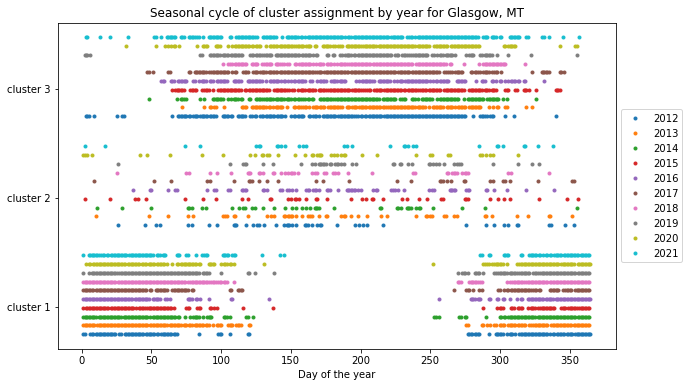

In [4]:
cluster_label_list = ["cluster 1", "cluster 2", "cluster 3", "cluster 4"]
vis.seasonal_assignment_by_year("Glasgow, MT", cluster_label_list[0:3], 3, glsDaily, glsIdx)

In [5]:
glsRaw = munge.from_raw("glasgowRaw.csv")
glsRaw.isnull().sum()

dewtemp_F      4043
drytemp_F      4023
prec_inch     39010
RH             4025
pres_mbar      3985
wetbulb_F      4203
wdir           6867
wgust_mph    111674
wspd_mph       4444
datetime          0
hour              0
month             0
dtype: int64

In [6]:
glsRaw.shape

(125898, 12)

In [7]:
glsDaily["cluster"] = glsIdx

In [8]:
glsDailyGroups = glsDaily.groupby('cluster')

In [9]:
glsDailyGroups.get_group(1).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.0
mean,1.915325,30.207138,12.875088,14.211336,19.23303,85.942970,60.262421,939.512573,931.114746,17.410427,2.590973,192.772568,0.008646,11.851645,9.800560,1.547936,10.659202,10.118265,0.428971,1.0
std,1.239170,14.860987,14.952024,13.648507,13.30386,6.745082,13.475531,6.956645,7.312242,6.314581,3.533512,71.813774,0.027043,5.497297,8.500954,4.104548,8.996927,9.440920,9.615363,0.0
min,1.000000,-20.000000,-32.000000,-29.000000,-25.00000,64.000000,17.000000,917.000000,904.000000,5.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-31.000000,1.0
25%,1.000000,21.000000,3.000000,6.000000,11.00000,82.000000,52.000000,935.000000,926.000000,13.000000,0.000000,127.000000,0.000000,12.000000,3.000000,0.000000,0.000000,0.000000,-7.000000,1.0
50%,1.000000,32.000000,16.000000,18.000000,22.00000,86.000000,62.000000,939.000000,931.000000,16.000000,0.000000,192.000000,0.000000,13.000000,6.000000,0.000000,9.000000,12.000000,-1.000000,1.0
75%,2.000000,41.000000,24.000000,24.000000,29.00000,92.000000,70.000000,944.000000,936.000000,21.000000,5.000000,254.000000,0.000000,14.000000,21.000000,0.000000,21.000000,21.000000,8.000000,1.0
max,4.000000,62.000000,45.000000,44.000000,47.00000,100.000000,91.500000,965.000000,954.000000,45.000000,22.500000,342.000000,0.350000,23.000000,23.000000,23.000000,23.000000,23.000000,27.000000,1.0


In [10]:
glsDailyGroups.get_group(2).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0
mean,2.752212,62.006638,43.643806,41.816372,46.827435,89.732300,49.676991,932.980103,925.895996,21.660398,3.869469,176.561951,0.150763,11.834071,9.637168,14.789823,12.165929,9.185841,1.106195,2.0
std,0.923033,17.751112,13.796641,11.900350,12.226300,6.861009,19.096550,5.315296,6.302096,6.558306,4.031140,69.057251,0.212191,4.517165,9.042214,6.301908,9.736274,7.990070,7.976252,0.0
min,1.000000,9.000000,3.000000,-0.000000,4.000000,58.000000,13.000000,914.000000,906.000000,7.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,2.0
25%,2.000000,48.000000,33.000000,33.000000,37.750000,86.000000,33.875000,930.000000,922.000000,17.000000,0.000000,114.750000,0.020000,12.000000,3.000000,10.000000,0.000000,0.000000,-5.000000,2.0
50%,3.000000,63.000000,46.000000,43.500000,48.000000,90.000000,49.000000,933.000000,926.000000,21.750000,3.000000,171.500000,0.080000,13.000000,4.000000,16.000000,11.000000,11.500000,3.000000,2.0
75%,3.000000,76.000000,55.000000,51.000000,57.000000,93.000000,65.000000,936.625000,930.000000,25.000000,6.000000,231.250000,0.180000,14.000000,21.000000,20.000000,22.000000,16.000000,7.000000,2.0
max,4.000000,98.000000,72.000000,65.000000,70.000000,100.000000,89.000000,950.000000,942.000000,43.000000,18.000000,324.000000,1.625000,23.000000,23.000000,23.000000,23.000000,23.000000,24.000000,2.0


In [11]:
glsDailyGroups.get_group(3).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.0
mean,2.913093,74.265518,46.911118,39.329571,49.553047,76.146729,27.226580,935.138855,929.126953,18.693567,2.989842,181.789505,0.003217,13.795147,5.880361,0.261287,9.259029,10.650113,-0.851580,3.0
std,0.803232,13.374379,11.735910,10.336884,9.392385,12.875832,10.198395,5.105976,5.921561,5.793386,3.404829,59.437313,0.016049,1.558684,6.559920,1.372478,8.804294,8.588039,6.736603,0.0
min,1.000000,38.500000,15.000000,11.000000,26.000000,30.000000,6.000000,916.000000,902.000000,7.500000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.000000,3.0
25%,2.000000,64.000000,37.000000,31.000000,42.000000,67.000000,20.000000,932.000000,925.000000,14.000000,0.000000,128.750000,0.000000,13.000000,3.000000,0.000000,0.000000,0.000000,-6.000000,3.0
50%,3.000000,75.000000,48.000000,40.000000,51.000000,77.000000,26.000000,935.000000,930.000000,17.000000,3.000000,180.000000,0.000000,14.000000,4.000000,0.000000,6.000000,14.000000,-3.000000,3.0
75%,4.000000,84.125000,56.000000,48.000000,58.000000,86.000000,33.000000,939.000000,933.000000,22.000000,5.000000,233.000000,0.000000,15.000000,5.000000,0.000000,20.000000,18.000000,5.000000,3.0
max,4.000000,109.000000,74.000000,63.000000,69.000000,100.000000,69.000000,952.500000,946.000000,51.000000,26.000000,328.000000,0.210000,22.000000,23.000000,15.000000,23.000000,23.000000,22.000000,3.0
